# Control experiment showing that neurons in the T1 sensilla do not respond to Z7 in wild-type flies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
from lfpan import *
from loaders import StabilityDurationRecording, LFPRecording, StabilityRecording

plt.style.use('jns')

In [2]:
cva_resp = pd.read_excel('data/Negative control.xlsx', index_col=0)
z7_resp = pd.read_excel('data/Negative control.xlsx', index_col=0, sheet_name='firing rate Z7')

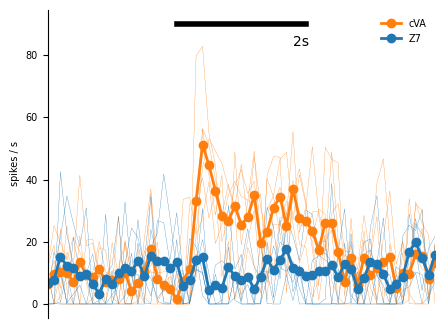

In [3]:
fig, ax = plt.subplots(figsize=(5,4))


tt = np.arange(0, 60, 0.1)

for col in cva_resp.columns[1:-1]:
    ax.plot(tt, cva_resp[col].values[:1200].reshape(600, 2).mean(axis=1), color='C1', lw=0.2)
    
for col in z7_resp.columns[1:-1]:
    ax.plot(tt, z7_resp[col].values[:1200].reshape(600, 2).mean(axis=1), color='C0', lw=0.2)
    

ax.plot(tt, cva_resp[cva_resp.columns[-1]].values[:1200].reshape(600, 2).mean(axis=1), color='C1', lw=2, marker='o', label='cVA')
ax.plot(tt, z7_resp[z7_resp.columns[-1]].values[:1200].reshape(600, 2).mean(axis=1), color='C0', lw=2, marker='o', label='Z7')

ax.legend(frameon=False)

ax.plot([20, 22], [90, 90], color='black', lw=4)
# plt.axvline(203)
# plt.axvline(223)

ax.set_xlim(18, 24)

# plt.axvspan(20, 22, alpha=0.2)

# ax.set_xlabel('time (s)')
ax.set_ylabel('spikes / s')

ax.text(21.8, 83, '2s', fontsize=10)

despine_ax(ax, 'b')

plt.savefig('control.png')